In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# STEP 1 
# # Exploring the data to see if we agree with the article's conclusion


In [4]:
fandango = pd.read_csv('fandango_scrape.csv')

In [5]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


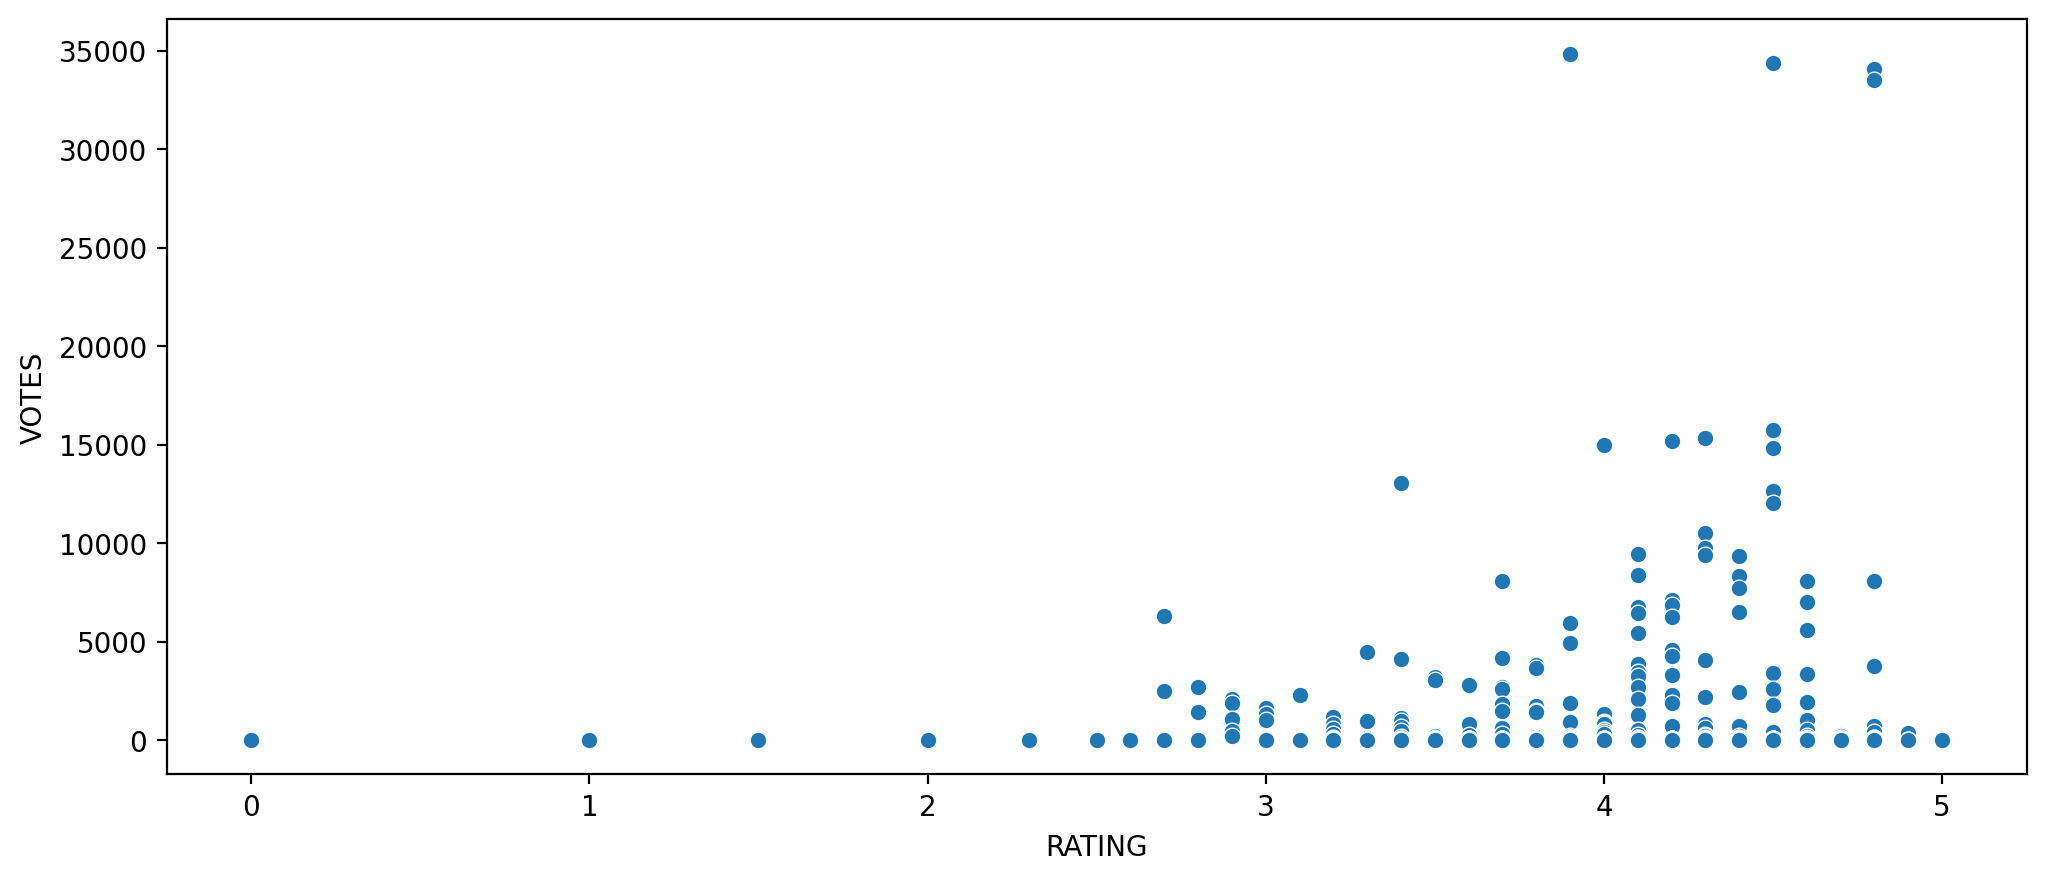

In [8]:
# Relationship between popularity of the film and it's rating
plt.figure(figsize=(12,5), dpi = 200)
sns.scatterplot(x = fandango.RATING,y = fandango.VOTES, data = fandango )
plt.show()

In [9]:
# Correlation between the columns

In [10]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [11]:
# Creating a new column called 'YEAR'

In [12]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split("(")[-1])
fandango['YEAR'] = fandango['YEAR'].apply(lambda title:title.split(')')[0])

In [13]:
# What is the distribution like for YEAR of movie release

In [14]:
fandango.YEAR.value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

In [15]:
# Visualizing the above data ^^^

<AxesSubplot:xlabel='YEAR', ylabel='count'>

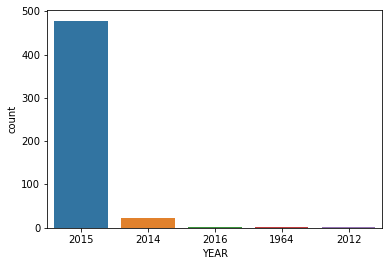

In [16]:
sns.countplot(x = fandango.YEAR, data=fandango)

In [17]:
# What are the top 10 movies with the highest votes

In [18]:
fandango.sort_values('VOTES', ascending = False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [19]:
# How many movies have 0 votes?

In [20]:
len(fandango[fandango['VOTES']==0])

69

In [21]:
df_f = fandango.drop(fandango[fandango['VOTES']==0].index)
df_f[df_f['VOTES']==0]

,FILM,STARS,RATING,VOTES,YEAR


In [22]:
# Checking out the distribution of ratings vs the stars given to the films on fandango

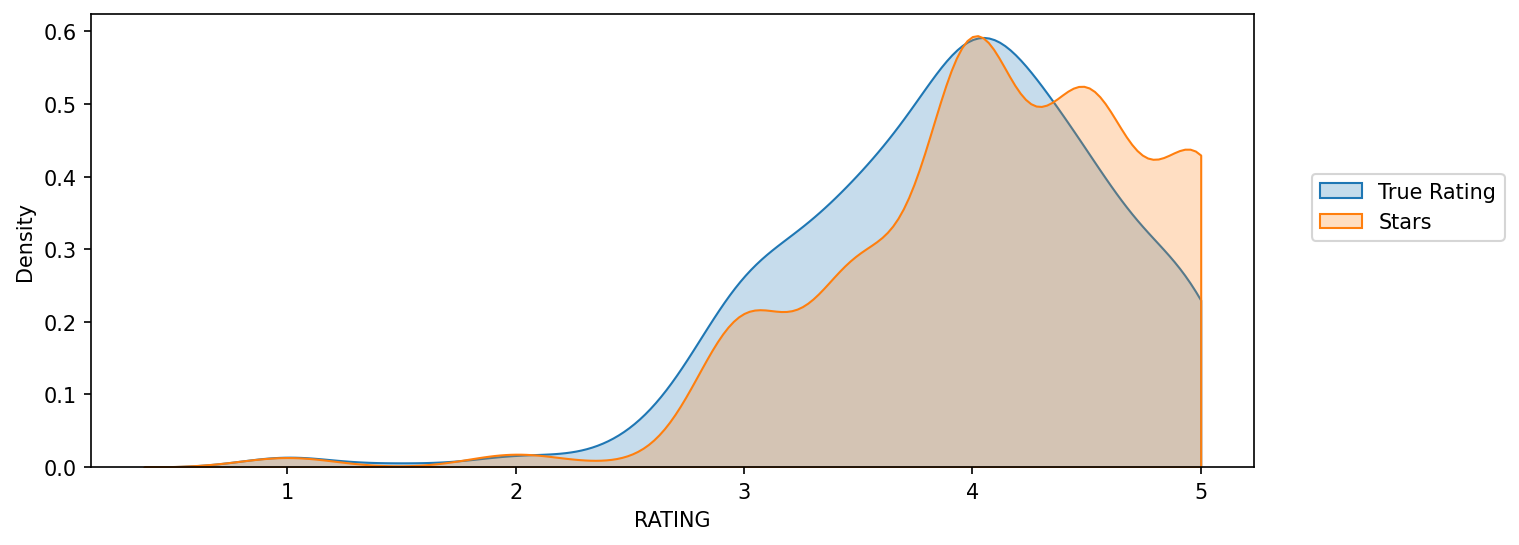

In [23]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=df_f,x='RATING',fill=True,clip=[0,5],label = 'True Rating')
sns.kdeplot(data=df_f,x='STARS',fill=True,clip=[0,5], label = 'Stars')
plt.legend(loc = [1.05,.5])

In [24]:
# Quantify the difference between STARS and RATING

In [25]:

df_f['STARS_DIFF']=round(df_f.STARS-df_f.RATING,2)
df_f.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [26]:
# Getting the counts of each difference by amount

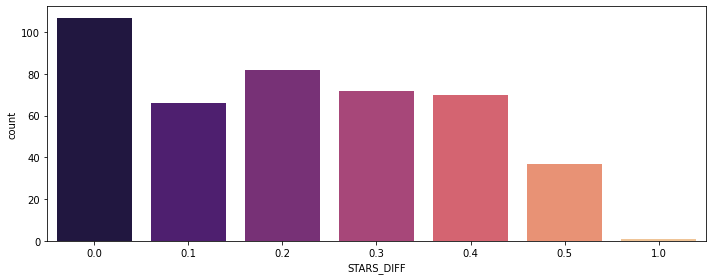

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x= 'STARS_DIFF',data = df_f,palette='magma')
plt.tight_layout()

In [28]:
# Finding the movie that had it's star increased by 1 

In [29]:
df_f[df_f['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [30]:
# # It's evident that fandango is pretty inconsistent when it comes to the calculations they
# use to align user ratings with the stars that they give to those movies. Now
# going to look at a couple of other sites and see fandango compares to them

In [31]:
all_sites=pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [32]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [33]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [34]:
# Looking at critic reviews and user reviews on Rotten Tomatoes

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

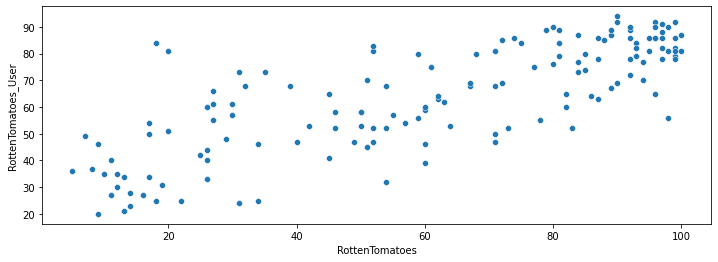

In [35]:
plt.figure(figsize=(12,4))
sns.scatterplot(x = 'RottenTomatoes',y='RottenTomatoes_User',data=all_sites)

In [36]:
# Difference between critics and users for Rotten Tomatoes

In [37]:
all_sites['Rotten_Diff']=all_sites.RottenTomatoes-all_sites.RottenTomatoes_User
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [38]:
# Mean difference between Critics and Users for Rotten Tomatoes

In [39]:
abs(all_sites['Rotten_Diff']).mean()

15.095890410958905

In [40]:
# Let's see the distribution on this difference for normal and absolute values

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

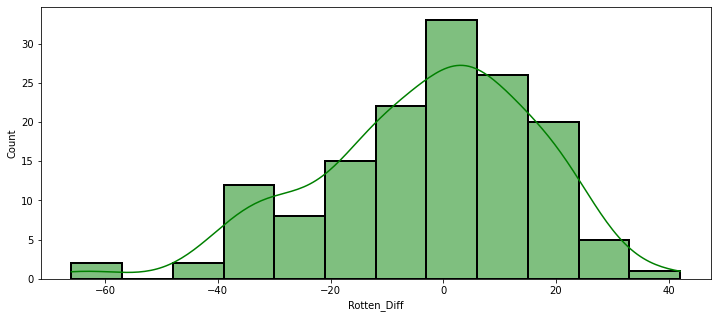

In [41]:
plt.figure(figsize=(12,5))
sns.histplot(data = all_sites, x ='Rotten_Diff',kde=True,color = 'green',linewidth=2)

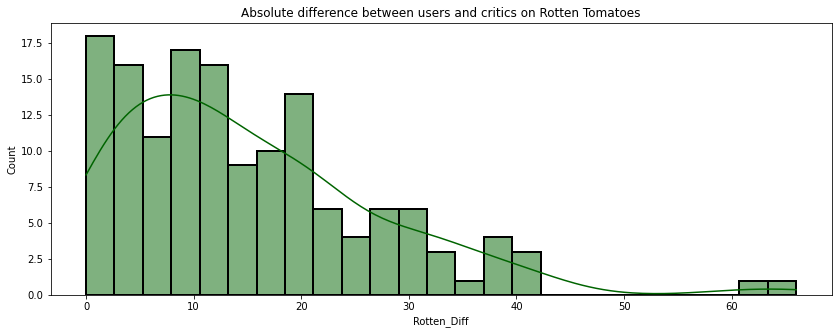

In [42]:
plt.figure(figsize=(14,5))
sns.histplot(data = all_sites, x =abs(all_sites['Rotten_Diff']),kde=True,color = 'darkgreen',linewidth=2,bins=25)
plt.title('Absolute difference between users and critics on Rotten Tomatoes');

In [43]:
all_sites.sort_values(by = 'Rotten_Diff')[['FILM','Rotten_Diff']].head()

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [44]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


In [45]:
# Looking at critic reviews and user reviews on MetaCritic

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

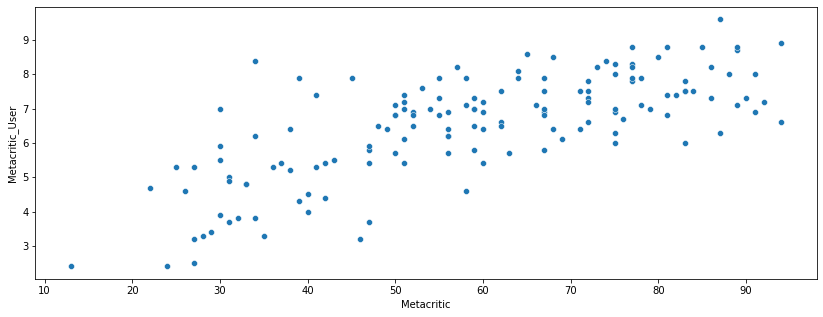

In [46]:
plt.figure(figsize=(14,5))
sns.scatterplot(x = 'Metacritic',y = 'Metacritic_User', data = all_sites)

In [47]:
# Vote count for Metacritic and IMDB

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

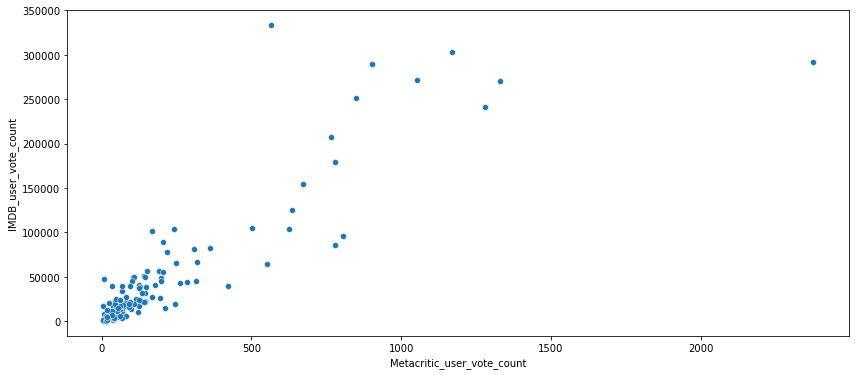

In [48]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'Metacritic_user_vote_count',y='IMDB_user_vote_count', data=all_sites)

In [49]:
# Since two movies are clear outliers here (2500 MC and 340000 IMDB) let us see what they are

In [50]:
all_sites.sort_values('Metacritic_user_vote_count', ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [51]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [52]:
# Merging all data together to create one big DF

In [53]:
df = pd.merge(fandango,all_sites,how = 'inner', on = 'FILM')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [55]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [56]:
# Normalization of all_sites data to match fandango

In [57]:
df['RT_norm'] = np.round(df['RottenTomatoes']/20,2)
df['RTU_norm'] = np.round(df['RottenTomatoes_User']/20,2)

df['MC_norm']=np.round(df['Metacritic']/20,2)
df['MCU_norm']=np.round(df['Metacritic_User']/2,2)

df['IMDB_norm']=np.round(df['IMDB']/2,2)

In [58]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_norm,RTU_norm,MC_norm,MCU_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.90,4.50,4.70,4.45,4.30


In [59]:
# Making a df that only contains scores

In [60]:
norm_scores = df[['IMDB_norm','MCU_norm','MC_norm','RTU_norm','RT_norm','RATING','STARS']]

In [61]:
norm_scores.head()

,IMDB_norm,MCU_norm,MC_norm,RTU_norm,RT_norm,RATING,STARS
0,2.10,1.60,2.30,2.10,1.25,3.9,4.0
1,3.65,3.50,2.95,4.05,3.55,4.5,4.5
2,3.70,3.30,3.60,4.25,3.60,4.8,5.0
3,3.70,3.40,3.35,4.20,4.05,4.8,5.0
4,4.30,4.45,4.70,4.50,4.90,4.5,4.5


In [62]:
# Fandango vs all other sites distribution of ratings to prove that it's ratings and stars are skewed to the right

In [63]:
# Had to learn how to move legend in kdeplots
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

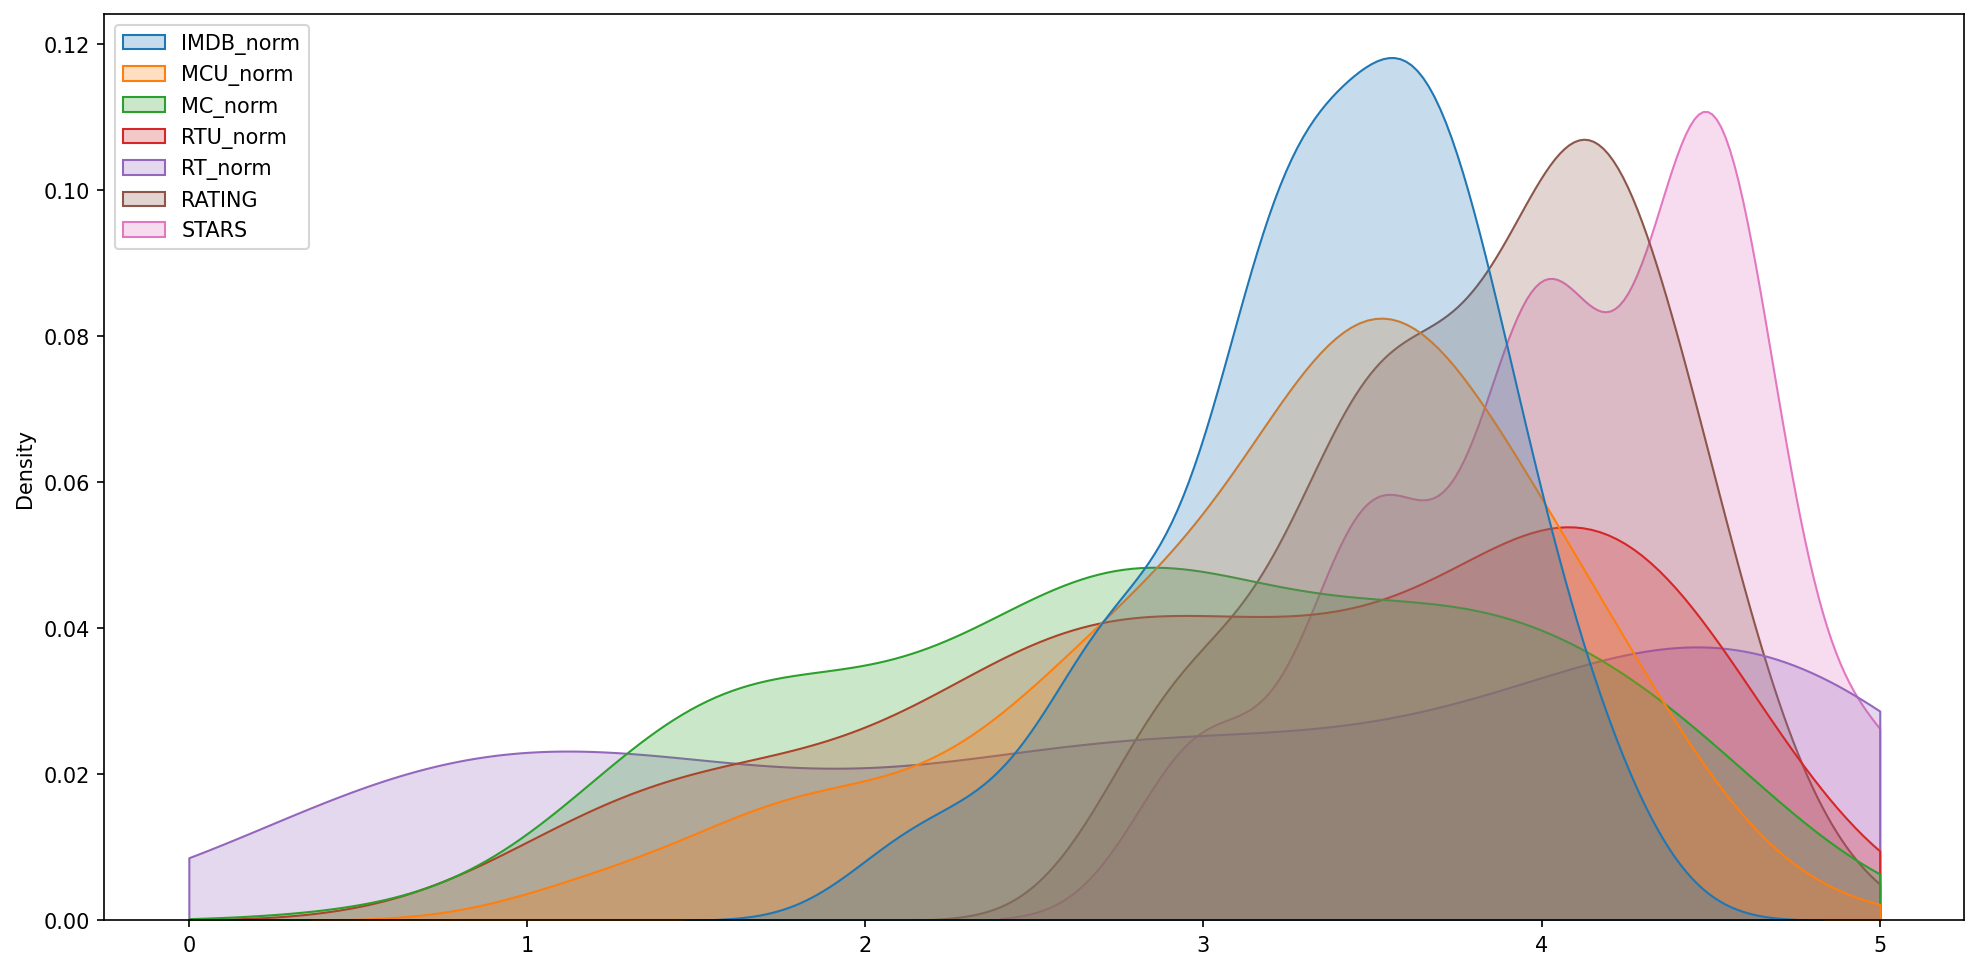

In [64]:
fig,ax = plt.subplots(figsize= (16,8),dpi = 150)
sns.kdeplot(data=norm_scores,clip = [0,5],shade = True)
move_legend(ax,'upper left')

In [65]:
# Let's compare RT_norm and STARS since RT looks to be the most unifrom distribution

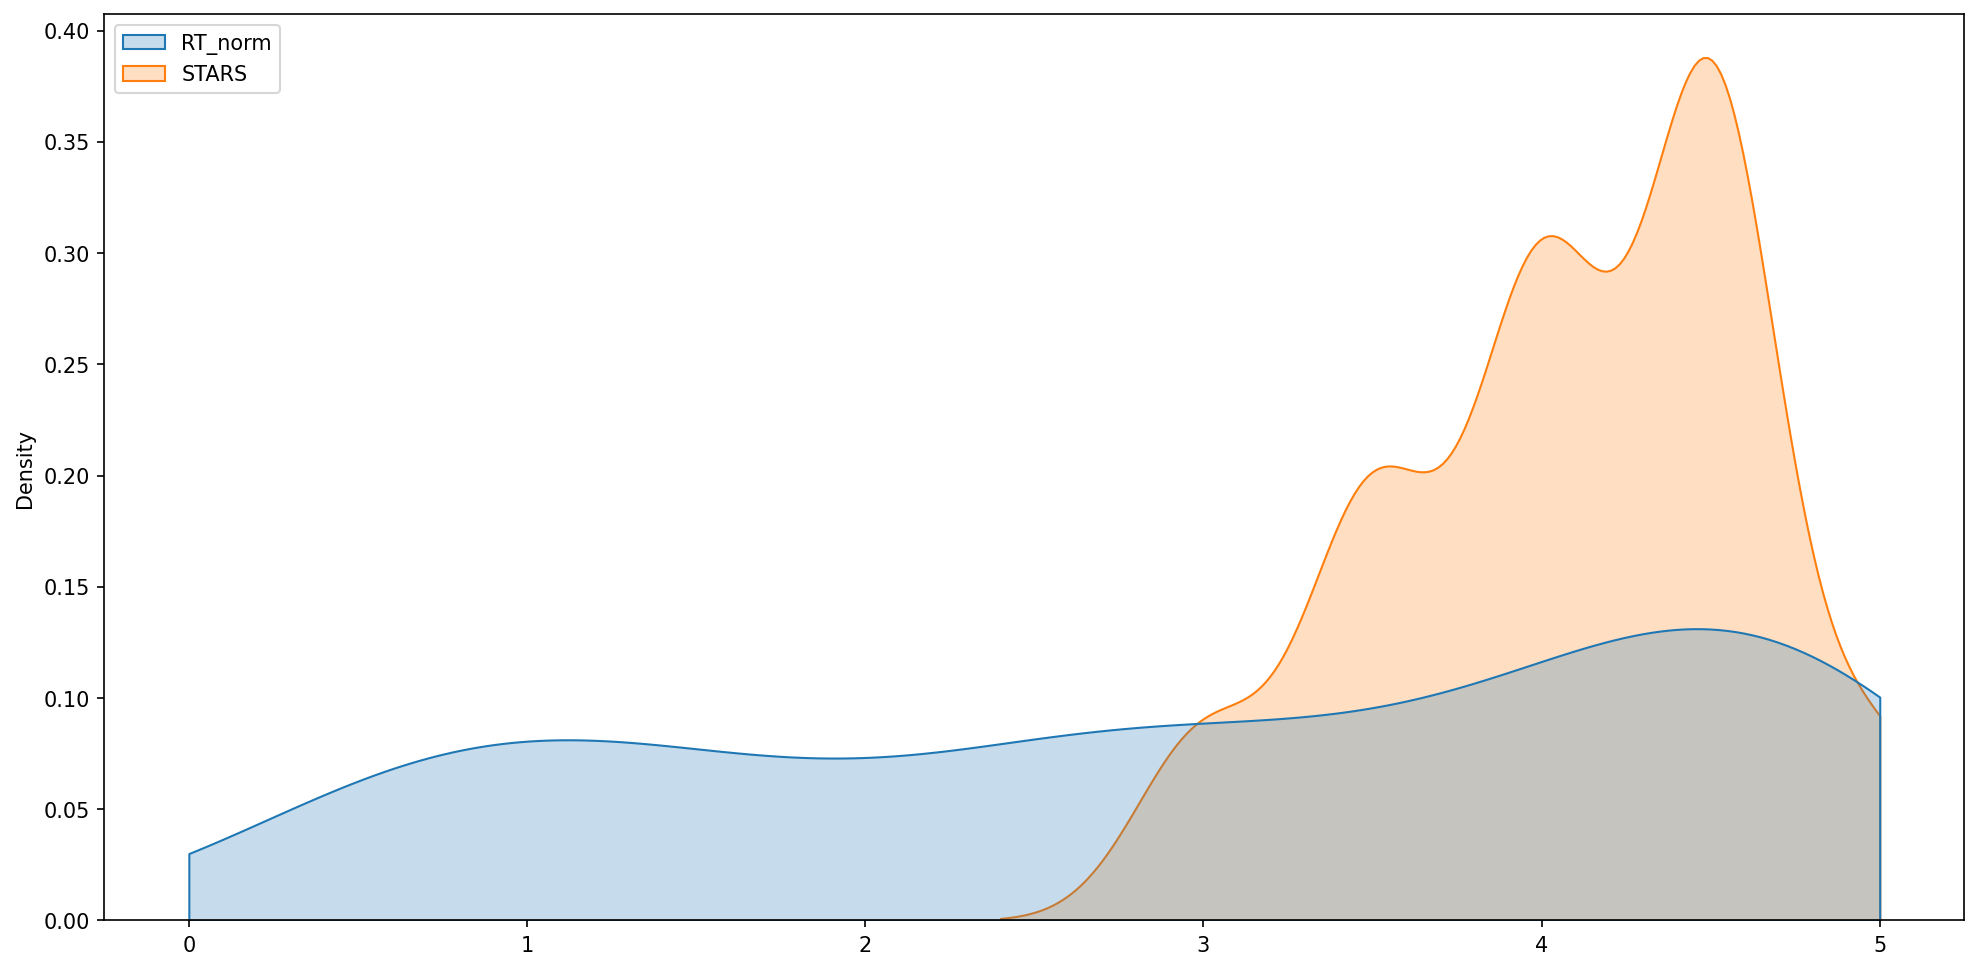

In [66]:
fig,ax = plt.subplots(figsize=(16,8),dpi=150)
sns.kdeplot(data = norm_scores[['RT_norm','STARS']],clip = [0,5],shade = True)
move_legend(ax,'upper left')

In [67]:
# Going to make a histplot to compare all normalized scores

<AxesSubplot:ylabel='Count'>

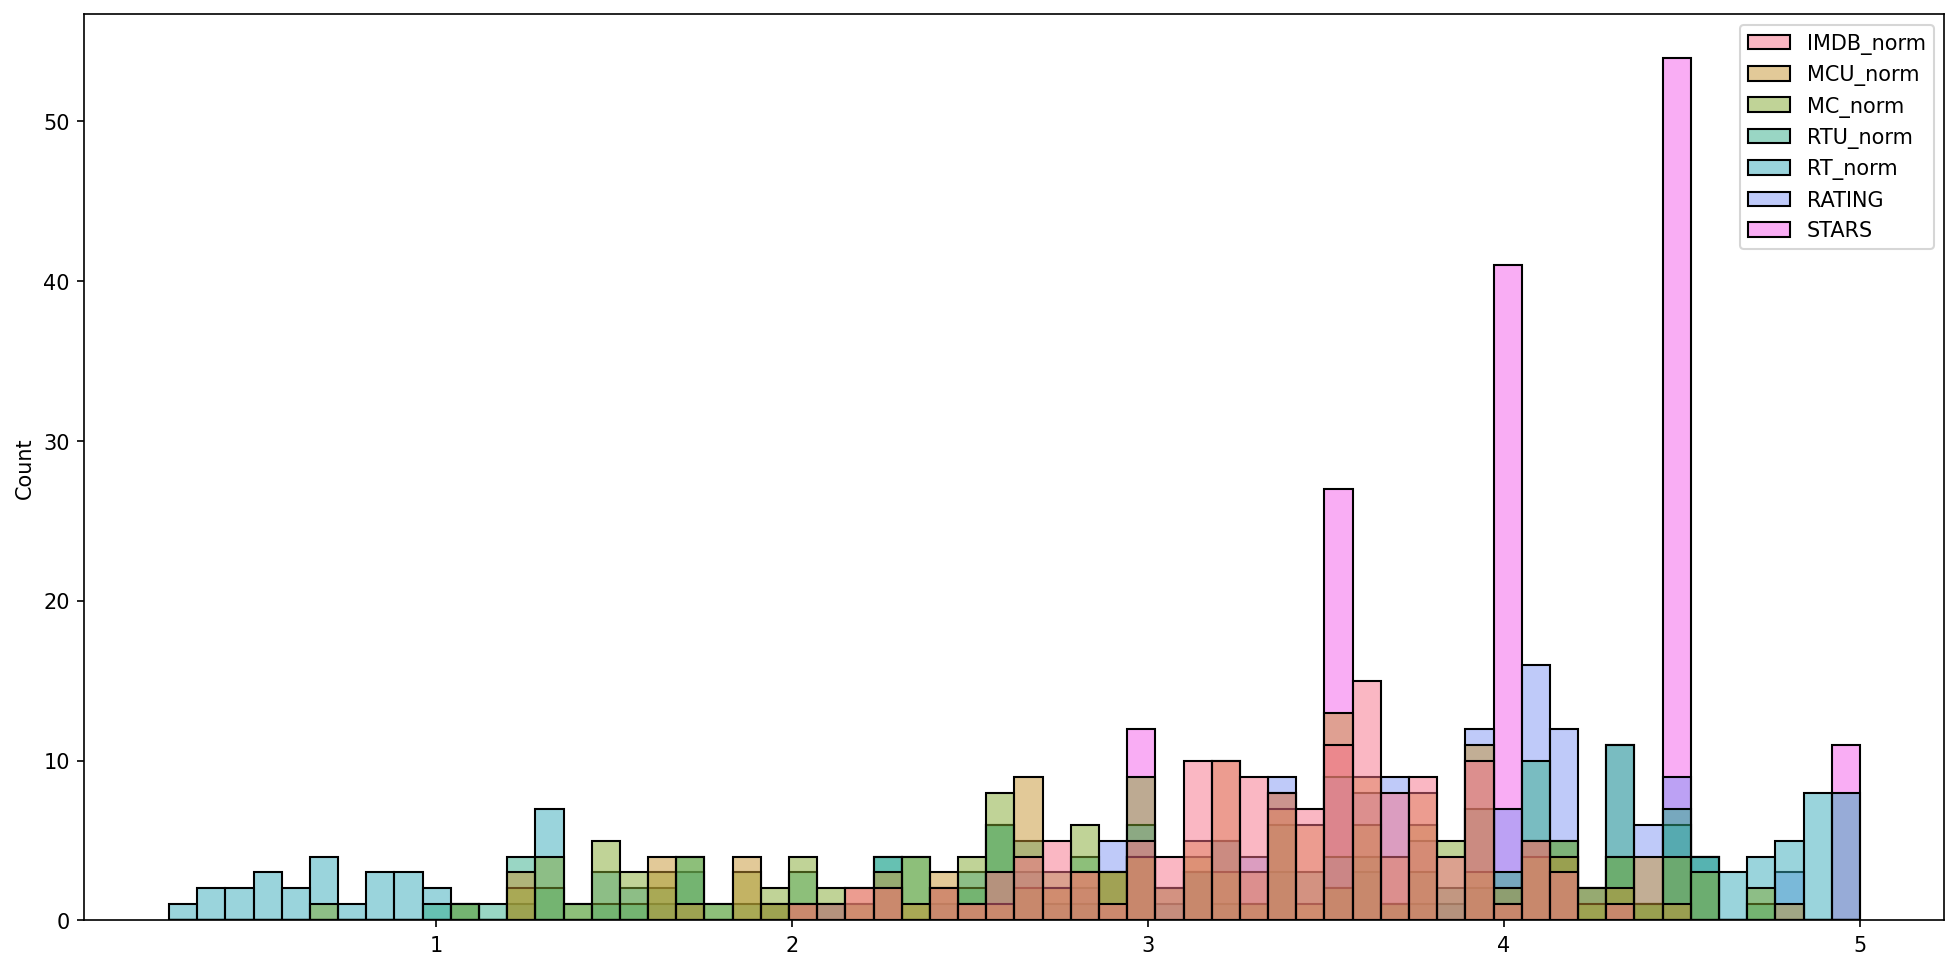

In [68]:
plt.figure(figsize=(16,8),dpi=150)
sns.histplot(data=norm_scores,bins = 60,palette='husl')

In [69]:
# Worst movies and their ratings accross the platforms

<Figure size 2400x1200 with 0 Axes>

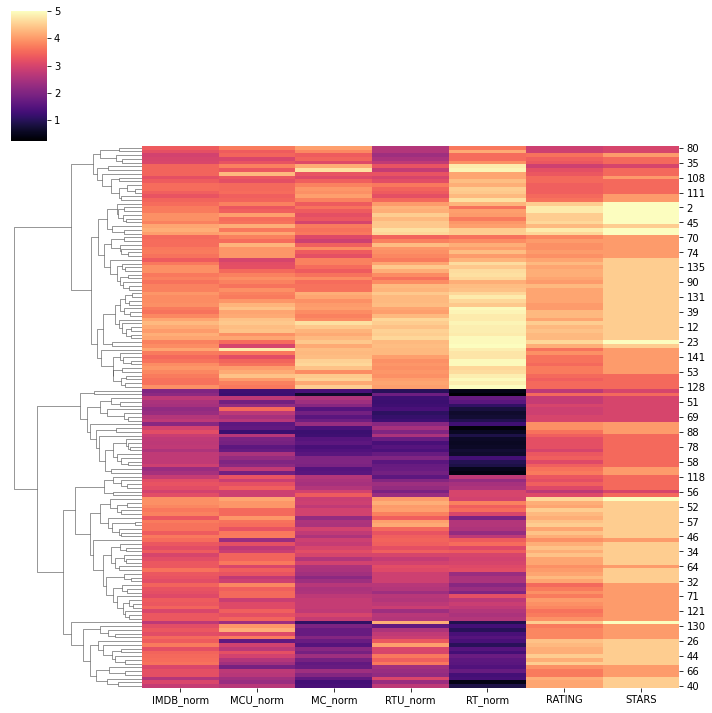

In [70]:
plt.figure(figsize=(16,8),dpi=150)
sns.clustermap(data= norm_scores,cmap='magma',col_cluster = False)

In [71]:
# Fandango seems to be the lightest of the 4 platforms meaning they rate bad movies higher than other sites
# Let's take the worst movies on RT and compare them to fandango

In [72]:
norm_films = df[['IMDB_norm','MCU_norm','MC_norm','RTU_norm','RT_norm','RATING','STARS','FILM']]
norm_films.nsmallest(10,'RT_norm')

,IMDB_norm,MCU_norm,MC_norm,RTU_norm,RT_norm,RATING,STARS,FILM
49,2.15,1.20,0.65,1.80,0.25,3.5,3.5,Paul Blart: Mall Cop 2 (2015)
84,2.95,1.65,1.40,2.45,0.35,3.9,4.0,Hitman: Agent 47 (2015)
54,2.45,1.85,1.55,1.85,0.40,3.7,4.0,Hot Pursuit (2015)
25,3.05,2.30,1.30,2.30,0.45,4.1,4.5,Taken 3 (2015)
28,2.00,1.25,1.35,1.00,0.45,2.7,3.0,Fantastic Four (2015)
50,2.30,2.75,1.50,1.75,0.50,3.6,4.0,The Boy Next Door (2015)
87,2.70,1.90,1.60,1.35,0.55,3.2,3.5,Unfinished Business (2015)
88,3.15,1.20,1.20,2.00,0.55,3.6,4.0,The Loft (2015)
77,2.75,1.95,1.50,1.75,0.60,3.2,3.5,Seventh Son (2015)
78,2.75,1.60,1.35,1.50,0.60,3.2,3.5,Mortdecai (2015)


<AxesSubplot:ylabel='Density'>

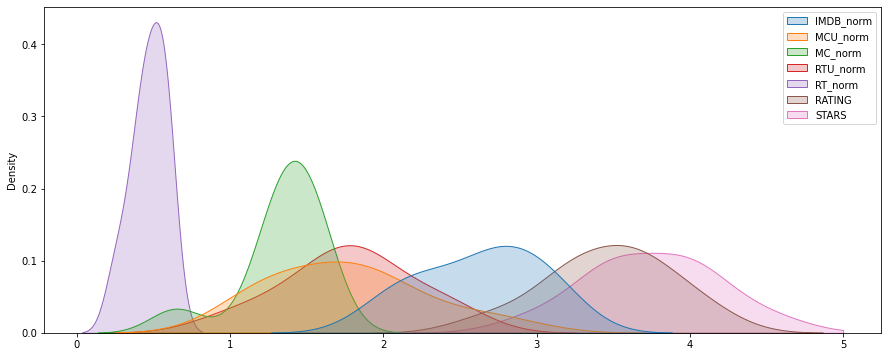

In [73]:
plt.figure(figsize=(15,6))
worst_films = norm_films.nsmallest(10,'RT_norm').drop('FILM',axis =1 )
sns.kdeplot(data=worst_films,clip=[0,5],shade=True)

In [75]:
norm_films.iloc[25]

IMDB_norm              3.05
MCU_norm                2.3
MC_norm                 1.3
RTU_norm                2.3
RT_norm                0.45
RATING                  4.1
STARS                   4.5
FILM         Taken 3 (2015)
Name: 25, dtype: object

In [76]:
(3.05+2.3+1.3+2.3+0.45)/5

1.8799999999999997

In [ ]:
# Average rating for Taken 3 was 4.5 but on all other sites it was only 1.88 stars????? Those crooks!